## Carga del dataset

In [2]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import pickle

df = pd.read_csv("ecommerce_dataset.csv")
df = df[["id", "name", "categories", "manufacturerNumber", "manufacturer", "reviews.username", "reviews.rating"]]

df.head(1)

,id,name,categories,manufacturerNumber,manufacturer,reviews.username,reviews.rating
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",14331328,Universal Music Group / Cash Money,Joshua,5


## Limpieza y agrupación de datos

In [3]:
df_vendors_products = df[['name', 'manufacturer']].drop_duplicates()
df_vendors_products = df_vendors_products.groupby('manufacturer')

products_distribution = sorted(df_vendors_products.count()['name'].values)

## Análisis exploratorio

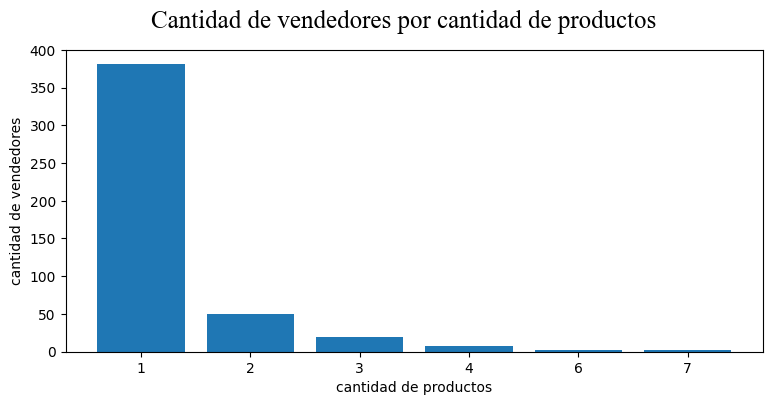

In [4]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from collections import Counter

ocurrences = Counter(products_distribution)
figure(figsize=(9, 4), dpi=100)
plt.bar([str(k) for k in ocurrences.keys()], ocurrences.values())
plt.suptitle("Cantidad de vendedores por cantidad de productos", fontsize=18, fontfamily='Times New Roman')
plt.ylabel('cantidad de vendedores')
plt.xlabel('cantidad de productos')

# print(ocurrences)
# print(381/463 * 100)

plt.savefig(r'C:\Users\crist\OneDrive\Desktop\Memoria\images\graphs\v_p_distr.eps', bbox_inches='tight', format='eps')

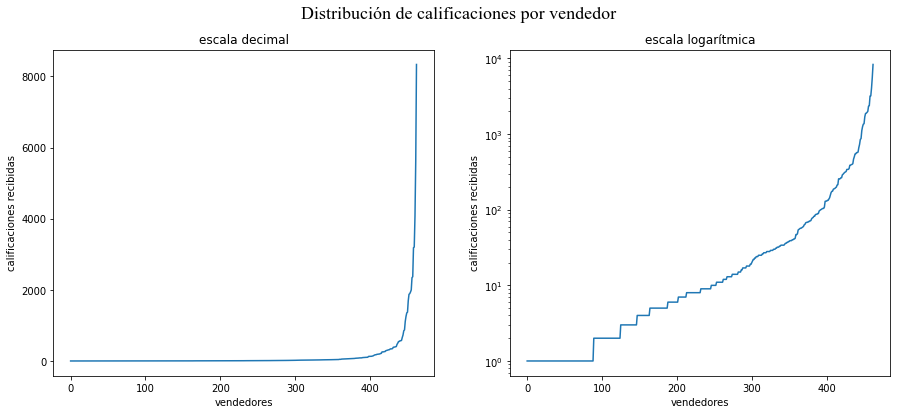

In [5]:
df_reviews_vendor = df[['name', 'manufacturer', 'reviews.username']].drop_duplicates()
df_reviews_vendor = df_reviews_vendor.groupby('manufacturer')

ratings_distribution = sorted(df_reviews_vendor.count()['reviews.username'].values)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 6)

fig.suptitle("Distribución de calificaciones por vendedor", fontsize=18, fontfamily='Times New Roman')
ax1.set_ylabel('calificaciones recibidas')
ax1.set_xlabel('vendedores')
ax1.set_title('escala decimal')
ax2.set_ylabel('calificaciones recibidas')
ax2.set_xlabel('vendedores')
ax2.set_title('escala logarítmica')
ax2.set_yscale('log')
ax1.plot(ratings_distribution)
ax2.plot(ratings_distribution)

fig.savefig(r'C:\Users\crist\OneDrive\Desktop\Memoria\images\graphs\r_v_distr.eps', bbox_inches='tight', format='eps')

56.333333333333336

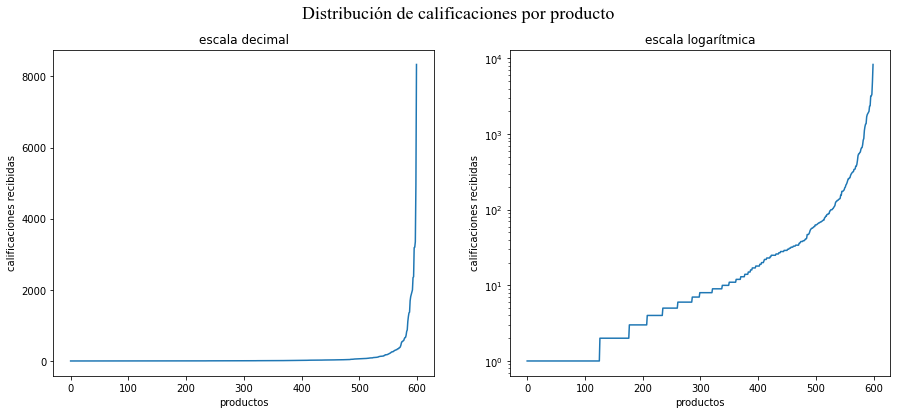

In [9]:
df_reviews_products = df[['name', 'manufacturer', 'reviews.username']].drop_duplicates()
df_reviews_products = df_reviews_products.groupby('name')

ratings_distribution = sorted(df_reviews_products.count()['reviews.username'].values)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 6)

fig.suptitle("Distribución de calificaciones por producto", fontsize=18, fontfamily='Times New Roman')
ax1.set_ylabel('calificaciones recibidas')
ax1.set_xlabel('productos')
ax1.set_title('escala decimal')
ax2.set_ylabel('calificaciones recibidas')
ax2.set_xlabel('productos')
ax2.set_title('escala logarítmica')
ax2.set_yscale('log')
ax1.plot(ratings_distribution)
ax2.plot(ratings_distribution)

fig.savefig(r'C:\Users\crist\OneDrive\Desktop\Memoria\images\graphs\r_p_distr.eps', bbox_inches='tight', format='eps')
sum([ v for k, v in Counter(ratings_distribution).items() if k < 10 ]) / len(ratings_distribution)*100

Counter({1: 53426,
         2: 3293,
         3: 702,
         4: 242,
         5: 141,
         6: 82,
         7: 42,
         8: 38,
         9: 27,
         10: 19,
         11: 24,
         12: 12,
         13: 8,
         14: 1,
         15: 5,
         16: 3,
         17: 7,
         18: 6,
         19: 1,
         20: 1,
         22: 2,
         23: 2,
         26: 1,
         27: 1,
         29: 1,
         75: 1})

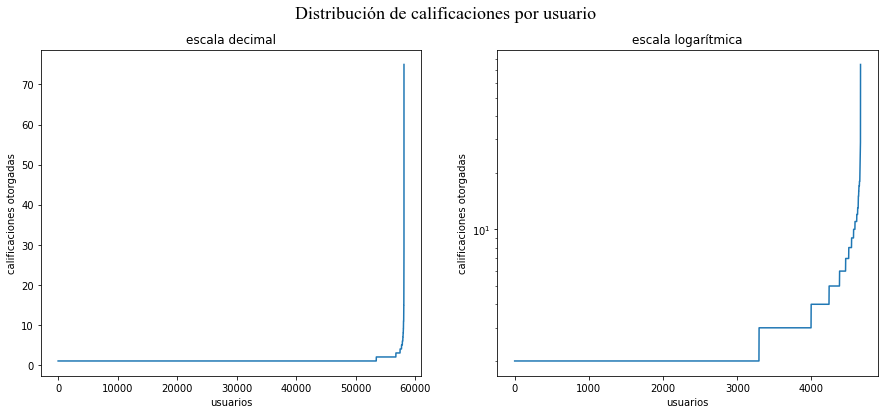

In [11]:
df_users_reviews = df[['name', 'manufacturer', 'reviews.username']].drop_duplicates()
df_users_reviews = df_users_reviews.groupby('reviews.username')

users_ratings_distribution = sorted(df_users_reviews.count()['name'].values)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 6)

fig.suptitle("Distribución de calificaciones por usuario", fontsize=18, fontfamily='Times New Roman')
ax1.set_ylabel('calificaciones otorgadas')
ax1.set_xlabel('usuarios')
ax1.set_title('escala decimal')
ax2.set_ylabel('calificaciones otorgadas')
ax2.set_xlabel('usuarios')
ax2.set_title('escala logarítmica')
ax2.set_yscale('log')
ax1.plot(users_ratings_distribution)
ax2.plot([i for i in users_ratings_distribution if i>1])

fig.savefig(r'C:\Users\crist\OneDrive\Desktop\Memoria\images\graphs\r_u_distr.eps', bbox_inches='tight', format='eps')




53426

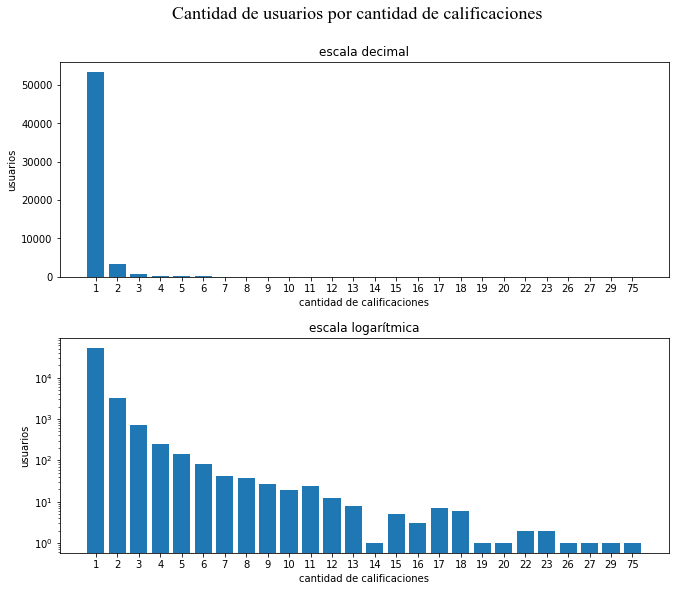

In [8]:
ocurrences = Counter(users_ratings_distribution)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 9)

fig.suptitle("Cantidad de usuarios por cantidad de calificaciones", fontsize=18, fontfamily='Times New Roman', y=0.93)
fig.tight_layout(pad=4)
ax1.set_ylabel('usuarios')
ax1.set_xlabel('cantidad de calificaciones')
ax1.set_title('escala decimal')
# ax1.tick_params('x', labelrotation=-45, labelsize=9)
ax2.set_ylabel('usuarios')
ax2.set_xlabel('cantidad de calificaciones')
ax2.set_title('escala logarítmica')
ax2.set_yscale('log')
# ax2.tick_params('x', labelrotation=-45)
ax1.bar([str(k) for k in ocurrences.keys()], ocurrences.values())
ax2.bar([str(k) for k in ocurrences.keys()], ocurrences.values())

fig.savefig(r'C:\Users\crist\OneDrive\Desktop\Memoria\images\graphs\u_p_distr.eps', bbox_inches='tight', format='eps')

ocurrences[1]

In [9]:
n = sum(users_ratings_distribution)
a = sum([i for i in users_ratings_distribution if i>=10])

print(a, a/n*100)

1352 2.033816715807209


In [10]:
different_users = df["reviews.username"].nunique()
different_products = df["name"].nunique()
different_vendors = df["manufacturer"].nunique()

print("total users:", different_users)
print("total products:", different_products)
print("total vendors:", different_vendors)

len(df.index)

total users: 58088
total products: 600
total vendors: 463


71044

In [11]:
df = df.rename(columns={ "id" : "productId", "name": "productName", "manufacturer": "vendorName", "manufacturerNumber": "vendorId", "reviews.username": "user", "reviews.rating": "rating" })
df.head(1)

df.loc[df['productId'] == 'AVpf3VOfilAPnD_xjpun']

,productId,productName,categories,vendorId,vendorName,user,rating
6588,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,"Household Essentials,Cleaning Supplies,Kitchen...",12992356,Clorox,Barsea,1
6589,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,"Household Essentials,Cleaning Supplies,Kitchen...",12992356,Clorox,Sofia50,1
6590,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,"Household Essentials,Cleaning Supplies,Kitchen...",12992356,Clorox,Renee65,1
6591,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,"Household Essentials,Cleaning Supplies,Kitchen...",12992356,Clorox,Angi677,1
6592,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,"Household Essentials,Cleaning Supplies,Kitchen...",12992356,Clorox,brandy33,1
...,...,...,...,...,...,...,...
15189,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,"Household Essentials,Cleaning Supplies,Kitchen...",12992356,Clorox,jcyrachel69,5
15190,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,"Household Essentials,Cleaning Supplies,Kitchen...",12992356,Clorox,Tiffmillion,5
15191,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,"Household Essentials,Cleaning Supplies,Kitchen...",12992356,Clorox,karingbear,5
15192,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,"Household Essentials,Cleaning Supplies,Kitchen...",12992356,Clorox,Rocky200718,5


In [12]:
df_ratings = df[["productId", "productName", "user", "rating"]]
df_ratings = df_ratings.drop_duplicates()

df_ratings['vendorId'] = df.groupby('vendorName').ngroup()
df_ratings = df_ratings.drop_duplicates()



## Limpieza de filas útiles

Dada la distribución de los datos del conjunto, muchos productos recibieron una única calificación. Por otro lado, muchos usuarios solo realizaron una calificación... Estos datos no son de utilidad para el experimento y solo aportan ruido, por lo que las filas en las que ocurrieran estos casos no fueron consideradas en el conjunto de datos final a utilizar.

In [13]:
def clean_dataframe(df):
    print('Collecting irrelevant products')
    groub_by_products = df[['productName', 'user']].drop_duplicates().groupby('productName')
    one_rating_products = []
    for productName, users_group in groub_by_products.__iter__():
        if len(users_group) == 1: #productName has received only one rating and it's from user
            one_rating_products.append(productName)

    groub_by_users = df[['productName', 'user']].drop_duplicates().groupby('user')
    irrelevant_products = []
    for user, products_group in groub_by_users.__iter__():
        if len(products_group) == 1: #user has given only one rating and was to productName
            productName = products_group.values[0][0] 
            if productName in one_rating_products:
                irrelevant_products.append(productName)
    print(f'{len(irrelevant_products)} will be deleted from the dataset...')
    
    return df[~df.productName.isin(irrelevant_products)]

cleaned_df = clean_dataframe(df_ratings)

with open("files/CF/cleaned_df.pkl", "wb") as file:
    pickle.dump(cleaned_df, file)
    file.close()

105 will be deleted from the dataset...


In [11]:
import scipy.sparse as sp
import copy
import pickle
from collaborative_filtering import Recommender

with open('files/utils/product_vendor_pairs.pkl', 'rb') as file:
    PRODUCT_VENDOR_PAIRS = pickle.load(file)
    file.close()

UNIQUE_VENDORS = list(set(PRODUCT_VENDOR_PAIRS.values()))
DYNAMIC_VENDOR_UNPOP = { vendorId: 0 for vendorId in UNIQUE_VENDORS }

def build_RS_from_df(df):
    ratings_data = df.to_dict()
    UNIQUE_USERS = list(df["user"].unique())
    UNIQUE_ITEMS = list(df["productId"].unique())

    row_ind = []
    col_ind = []
    data = []
    for row in ratings_data["productId"]:
        row_ind.append(UNIQUE_USERS.index(ratings_data["user"][row]))
        col_ind.append(UNIQUE_ITEMS.index(ratings_data["productId"][row]))
        data.append(ratings_data["rating"][row])

    X = sp.csr_matrix((data, (row_ind, col_ind)), shape=(len(UNIQUE_USERS), len(UNIQUE_ITEMS))).tolil()

    RS = Recommender(X.tocsr())
    RS.users_data = ratings_data
    RS.unique_users = UNIQUE_USERS
    RS.unique_items = UNIQUE_ITEMS

    return RS

def calc_SOG_prof_ui(top_items, user_data, items_similarity_matrix):
    n = len(user_data)
    SOG_prof_ui = {}
    if n > 0:
        for i_item, _ in top_items:
            prof_ui = 0
            for u_item in user_data:
                prof_ui += (1 - items_similarity_matrix[i_item][u_item])
            SOG_prof_ui[i_item] = prof_ui/n
    return SOG_prof_ui

def SOG_score_predictions(item_data, RS, candidate_set, prof_ui):
    RS_SOG_REL_PARAM_W = 0.15
    RS_SOG_DIV_PARAM_W = 0.15
    RS_SOG_PROF_UI_PARAM_W = 0.15
    RS_SOG_UNPOP_I_PARAM_W = 0.15
    RS_SOG_VENDOR_UNPOP_PARAM_W = 0.2
    RS_SOG_DIV_VEN_PARAM_W = 0.2

    n = 0
    score = 0
    div_iB = 0
    i_item_index, i_item_relevance = item_data
    unpop_i = 1 - RS.unpop[0, item_data[0]]
    items_similarity_matrix = RS.items_similarity_matrix
    product_vendor = PRODUCT_VENDOR_PAIRS[RS.unique_items[item_data[0]]]
    vendor_unpop = 1/(DYNAMIC_VENDOR_UNPOP[product_vendor] + 1)

    for c_item_index, _ in candidate_set:
        candidate_vendor = PRODUCT_VENDOR_PAIRS[RS.unique_items[c_item_index]]
        if product_vendor == candidate_vendor: n += 1
        div_iB += (1 - items_similarity_matrix[i_item_index][c_item_index])
    div_vendor_iB = 1/(n+1)
    score += RS_SOG_REL_PARAM_W      * i_item_relevance \
          +  RS_SOG_DIV_PARAM_W      * (div_iB/len(candidate_set)) \
          +  RS_SOG_PROF_UI_PARAM_W  * prof_ui \
          +  RS_SOG_UNPOP_I_PARAM_W  * unpop_i \
          +  RS_SOG_VENDOR_UNPOP_PARAM_W * vendor_unpop \
          +  RS_SOG_DIV_VEN_PARAM_W  * div_vendor_iB
    return score

def SOG_predictions(out, SOG_prof_ui, RS):
    SOG_response = []
    max_r = out['r'][0][1]
    out['r'] = [ (i, r/max_r) for i, r in out['r']]
    DYNAMIC_VENDOR_UNPOP[PRODUCT_VENDOR_PAIRS[RS.unique_items[out['r'][0][0]]]] += 1
    SOG_response.append(out['r'].pop(0))
    for i in range(len(out['r'])):
        max_score = -1
        for item_data in out['r']:
            score = SOG_score_predictions(
                item_data,
                RS,
                SOG_response, 
                SOG_prof_ui.get(item_data[0], 0)                
            )
            if score > max_score:
                max_score = score
                best_item = item_data
        best_item_index = out['r'].index(best_item)
        DYNAMIC_VENDOR_UNPOP[PRODUCT_VENDOR_PAIRS[RS.unique_items[out['r'][best_item_index][0]]]] += 1
        SOG_response.append(out['r'].pop(best_item_index))
    return SOG_response

def CF_SOG(RS, CF_out):
    SOG_prof_ui = calc_SOG_prof_ui( CF_out['r'], [], RS.items_similarity_matrix )
    SOG_response = SOG_predictions( CF_out, SOG_prof_ui, RS )
    return SOG_response

def new_get_CF_SOG_results(df_train, df_eval):

    final_results = {}
    print('Building RS')
    RS = build_RS_from_df(df_train)
    eval_users = df_eval['user'].unique()
    print('eval users:', len(eval_users))
    # cont = 0
    for user in eval_users:
        # if (cont + 1) % 250 == 0: print(f'Getting prediction for user {cont + 1}/{len(eval_users)}')
        if user in RS.unique_users:
            index = (RS.unique_users).index(user)
            CF_response = RS.recommend(index, top_users=20, top_items=20, limits=None)
            if CF_response['r'][0][1] != 0 and CF_response['std'] != 0:
                response_copy = copy.deepcopy(CF_response)
                SOG_response = CF_SOG(RS, response_copy)
                final_results[user] = {
                    'CF_response' : CF_response,
                    'SOG_response' : SOG_response
                }
        # cont += 1
    print('Saving model')
    with open("files/CF/df_cleaned_RS.pkl", "wb") as file:
        pickle.dump(RS, file)
        file.close()
    return final_results


In [24]:
from sklearn.model_selection import train_test_split

with open('files/CF/cleaned_df.pkl', 'rb') as file:
    cleaned_df = pickle.load(file)
    file.close()
cleaned_df = cleaned_df.dropna()   
df_train, df_eval = train_test_split(cleaned_df, test_size=0.2)

CF_outputs = new_get_CF_SOG_results(df_train, df_eval)

Building RS
eval users: 12721
Saving model


In [25]:
with open("files/CF/df_cleaned_CF_SOG_final_results.pkl", "wb") as file:
    pickle.dump(CF_outputs, file)
    file.close()

with open("files/CF/df_cleaned_train.pkl", "wb") as file:
    pickle.dump(df_train, file)
    file.close()

with open("files/CF/df_cleaned_eval.pkl", "wb") as file:
    pickle.dump(df_eval, file)
    file.close()

In [141]:
import pickle
import copy
import numpy as np
from scipy.stats import logistic

with open('files/CF/df_cleaned_RS.pkl', 'rb') as file:
    RS = pickle.load(file)
    file.close()
with open("files/CF/df_cleaned_CF_SOG_final_results.pkl", "rb") as file:
# with open("files/CF/CF_SOG_final_results.pkl", "rb") as file:
    CF_SOG_final_results = pickle.load(file)
    file.close()
with open('files/utils/product_vendor_pairs.pkl', 'rb') as file:
    products_and_vendors_dict = pickle.load(file)
    file.close()
with open('files/CF/df_cleaned_eval.pkl', 'rb') as file:
    df_eval = pickle.load(file)
    file.close()
with open('files/CF/df_cleaned_train.pkl', 'rb') as file:
    df_train = pickle.load(file)
    file.close()




In [142]:
def get_product_vendor(product_id):
    return products_and_vendors_dict[product_id]
def lineal_ranking_score(ranking, n):
    return n - ranking

def logistic_ranking_score(ranking, n):
    return n*(1 - logistic.cdf(ranking, loc=n/4, scale=n/20))

def binary_visibility_at_n(visibility_dict, response, is_ES, n, unique_items):
    if is_ES:
        checked_vendors = []
        for doc in response[:n]:
            id = doc['_source']['vendorId']
            if id not in checked_vendors:
                visibility_dict[id] += 1
                checked_vendors.append(id)
    else:
        checked_vendors = []
        for product_index, rating in response[:n]:
            id = get_product_vendor(unique_items[product_index])
            if id not in checked_vendors:
                visibility_dict[id] += 1
                checked_vendors.append(id)

def ranked_visibility(visibility_dict, response, is_ES, n, rank_score_func, unique_items):
    if is_ES:
        for ranking, doc in enumerate(response):
            id = doc['_source']['vendorId']
            visibility_dict[id] += rank_score_func(ranking, n)
    else:
        for ranking, (product_index, rating) in enumerate(response):
            id = get_product_vendor(unique_items[product_index])
            visibility_dict[id] += rank_score_func(ranking, n)

def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

def get_vendors_visibility_array(
        products_and_vendors_dict, 
        responses, 
        algorithm_response, 
        is_ES, 
        is_binary,
        unique_items,
        binary_n=10, 
        ranked_score_func= lineal_ranking_score
    ):
    vendors_visibility = { vendorId: 0 for _, vendorId in products_and_vendors_dict.items() }
    if is_ES:
        for query, response_pair in responses.items():
            #print(len(response_pair[algorithm_response]))
            if is_binary:
                binary_visibility_at_n(vendors_visibility, response_pair[algorithm_response], is_ES, binary_n)
            else:
                ranked_visibility(vendors_visibility, response_pair[algorithm_response], is_ES, 100, ranked_score_func)
    else:
        for user, response_pair in responses.items():
            if is_binary:
                binary_visibility_at_n(vendors_visibility, response_pair[algorithm_response], is_ES, binary_n, unique_items)
            else:
                ranked_visibility(vendors_visibility, response_pair[algorithm_response], is_ES, 20, ranked_score_func, unique_items)
    return np.array([score for _, score in vendors_visibility.items()])

# Evaluación CF vs CF + SOG

binary n = 3
CF binary Gini @ 3: 0.9364499827394422
CF SOG binary Gini @ 3: 0.8793413031053534
--------------------------------------------------
binary n = 5
CF binary Gini @ 5: 0.9328782724022604
CF SOG binary Gini @ 5: 0.8907431845707365
--------------------------------------------------
binary n = 10
CF binary Gini @ 10: 0.930474932131924
CF SOG binary Gini @ 10: 0.9142124227081023
--------------------------------------------------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


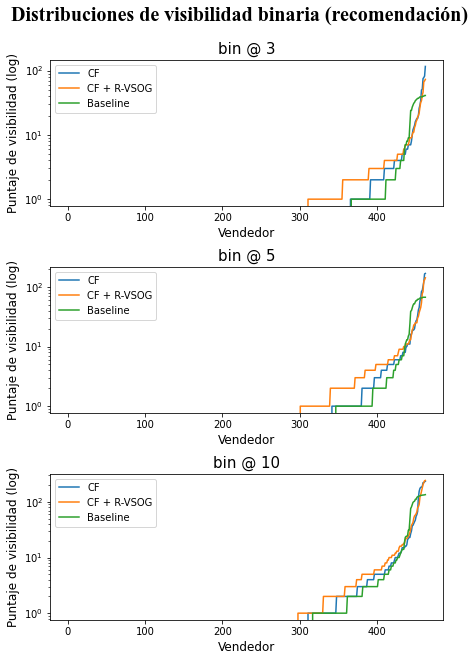

In [150]:
import matplotlib.pylab as plt
with open('files/CF/baseline.pkl', 'rb') as file:
    baseline = pickle.load(file)
    file.close()

final_results = copy.deepcopy(CF_SOG_final_results)
n = [3, 5, 10]
for user, response_pair in final_results.items():
    final_results[user]['CF_response'] = response_pair['CF_response']['r']
CF_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='CF_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[0])
CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='SOG_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[0])

CF_gini_b_3 = gini_coefficient(CF_visibility)
CF_SOG_gini_b_3 = gini_coefficient(CF_SOG_visibility)

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_size_inches(7, 10)

fig.suptitle('Distribuciones de visibilidad binaria (recomendación)', fontsize=20, fontweight='bold', fontfamily='Times New Roman', y=0.93)
fig.tight_layout(pad=4)

ax1.plot(sorted(CF_visibility), label= 'CF')
ax1.plot(sorted(CF_SOG_visibility), label = 'CF + R-VSOG')
ax1.plot(sorted(baseline[9][0]), label = 'Baseline')
ax1.set_title('bin @ 3', fontsize=15)
ax1.legend(loc='best')
ax1.set_xlabel('Vendedor', fontsize=12)
ax1.set_ylabel('Puntaje de visibilidad (log)', fontsize=12)
ax1.set_yscale('log')

print(f'binary n = {n[0]}\nCF binary Gini @ {n[0]}: {CF_gini_b_3}\nCF SOG binary Gini @ {n[0]}: {CF_SOG_gini_b_3}')
print('-'*50)
CF_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='CF_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[1])
CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='SOG_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[1])

CF_gini_b_5 = gini_coefficient(CF_visibility)
CF_SOG_gini_b_5 = gini_coefficient(CF_SOG_visibility)

ax2.plot(sorted(CF_visibility), label= 'CF')
ax2.plot(sorted(CF_SOG_visibility), label = 'CF + R-VSOG')
ax2.plot(sorted(baseline[9][1]), label = 'Baseline')
ax2.set_title('bin @ 5', fontsize=15)
ax2.legend(loc='best')
ax2.set_xlabel('Vendedor', fontsize=12)
ax2.set_ylabel('Puntaje de visibilidad (log)', fontsize=12)
ax2.set_yscale('log')

print(f'binary n = {n[1]}\nCF binary Gini @ {n[1]}: {CF_gini_b_5}\nCF SOG binary Gini @ {n[1]}: {CF_SOG_gini_b_5}')
print('-'*50)
CF_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='CF_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[2])
CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='SOG_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[2])

CF_gini_b_10 = gini_coefficient(CF_visibility)
CF_SOG_gini_b_10 = gini_coefficient(CF_SOG_visibility)

ax3.plot(sorted(CF_visibility), label= 'CF')
ax3.plot(sorted(CF_SOG_visibility), label = 'CF + R-VSOG')
ax3.plot(sorted(baseline[9][2]), label = 'Baseline')
ax3.set_title('bin @ 10', fontsize=15)
ax3.legend(loc='best')
ax3.set_xlabel('Vendedor', fontsize=12)
ax3.set_ylabel('Puntaje de visibilidad (log)', fontsize=12)
ax3.set_yscale('log')

print(f'binary n = {n[2]}\nCF binary Gini @ {n[2]}: {CF_gini_b_10}\nCF SOG binary Gini @ {n[2]}: {CF_SOG_gini_b_10}')
print('-'*50)

fig.savefig(r'C:\Users\crist\OneDrive\Desktop\Memoria\images\graphs\cf_binary_visibility_distr.eps', bbox_inches='tight', format='eps')

rank func: lineal
CF ranked Gini: 0.9262357409280222
CF SOG ranked Gini: 0.9139860562859534
--------------------------------------------------
rank func: logistic
CF ranked Gini: 0.9313213812462137
CF SOG ranked Gini: 0.8946185928100061


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


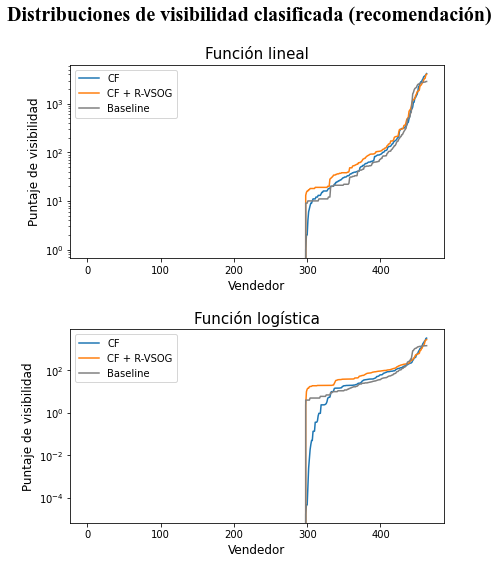

In [151]:
import matplotlib.pylab as plt
from scipy.stats import ttest_rel, pearsonr


final_results = copy.deepcopy(CF_SOG_final_results)
for user, response_pair in final_results.items():
    final_results[user]['CF_response'] = response_pair['CF_response']['r']

fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(7, 9)

fig.suptitle('Distribuciones de visibilidad clasificada (recomendación)', fontsize=20, fontweight='bold', fontfamily='Times New Roman', y=0.9)
fig.tight_layout(pad=5)

CF_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='CF_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=False, ranked_score_func= lineal_ranking_score)
CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='SOG_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=False, ranked_score_func= lineal_ranking_score)

CF_gini_r_lnl = gini_coefficient(CF_visibility)
CF_SOG_gini_r_lnl = gini_coefficient(CF_SOG_visibility)

ax1.plot(sorted(CF_visibility), label= 'CF')
ax1.plot(sorted(CF_SOG_visibility), label = 'CF + R-VSOG')
ax1.plot(sorted(baseline[9][3]), label = 'Baseline', color='grey')
ax1.set_title('Función lineal', fontsize=15)
ax1.legend(loc='best')
ax1.set_xlabel('Vendedor', fontsize=12)
ax1.set_ylabel('Puntaje de visibilidad', fontsize=12)
ax1.set_yscale('log')

print(f'rank func: lineal\nCF ranked Gini: {CF_gini_r_lnl}\nCF SOG ranked Gini: {CF_SOG_gini_r_lnl}')
print('-'*50)
CF_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='CF_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=False, ranked_score_func= logistic_ranking_score)
CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='SOG_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=False, ranked_score_func= logistic_ranking_score)

CF_gini_r_lgstc = gini_coefficient(CF_visibility)
CF_SOG_gini_r_lgstc = gini_coefficient(CF_SOG_visibility)

# CF_visibility = [x for x in CF_visibility if x != 0]
# CF_SOG_visibility = [x for x in CF_SOG_visibility if x != 0]    

ax2.plot(sorted(CF_visibility), label= 'CF')
ax2.plot(sorted(CF_SOG_visibility), label = 'CF + R-VSOG')
ax2.plot(sorted(baseline[9][4]), label = 'Baseline', color='grey')
ax2.set_title('Función logística', fontsize=15)
ax2.legend(loc='best')
ax2.set_xlabel('Vendedor', fontsize=12)
ax2.set_ylabel('Puntaje de visibilidad', fontsize=12)
ax2.set_yscale('log')

print(f'rank func: logistic\nCF ranked Gini: {CF_gini_r_lgstc}\nCF SOG ranked Gini: {CF_SOG_gini_r_lgstc}')

fig.savefig(r'C:\Users\crist\OneDrive\Desktop\Memoria\images\graphs\cf_ranked_visibility_distr.eps', bbox_inches='tight', format='eps')

binary n = 3
CF binary Gini @ 3: 0.9364499827394422
CF SOG binary Gini @ 3: 0.8793413031053534
--------------------------------------------------
binary n = 5
CF binary Gini @ 5: 0.9328782724022604
CF SOG binary Gini @ 5: 0.8907431845707365
--------------------------------------------------
binary n = 10
CF binary Gini @ 10: 0.930474932131924
CF SOG binary Gini @ 10: 0.9142124227081023
--------------------------------------------------


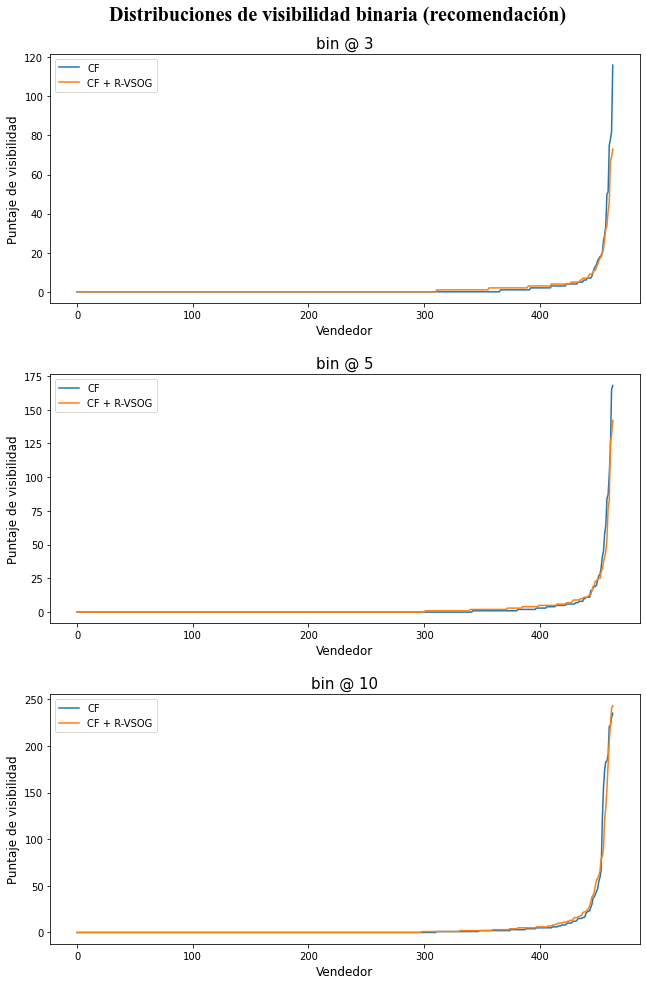

In [145]:
import matplotlib.pylab as plt
from scipy.stats import ttest_rel, pearsonr

final_results = copy.deepcopy(CF_SOG_final_results)
n = [3, 5, 10]
for user, response_pair in final_results.items():
    final_results[user]['CF_response'] = response_pair['CF_response']['r']
CF_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='CF_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[0])
CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='SOG_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[0])

CF_gini = gini_coefficient(CF_visibility)
CF_SOG_gini = gini_coefficient(CF_SOG_visibility)

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_figwidth(10)
fig.set_figheight(15)
fig.suptitle('Distribuciones de visibilidad binaria (recomendación)', fontsize=20, fontweight='bold', fontfamily='Times New Roman', y=0.93)
fig.tight_layout(pad=5)

ax1.plot(sorted(CF_visibility), label= 'CF')
ax1.plot(sorted(CF_SOG_visibility), label = 'CF + R-VSOG')
ax1.set_title('bin @ 3', fontsize=15)
ax1.legend(loc='best')
ax1.set_xlabel('Vendedor', fontsize=12)
ax1.set_ylabel('Puntaje de visibilidad', fontsize=12)
# ax1.set_yscale('log')

print(f'binary n = {n[0]}\nCF binary Gini @ {n[0]}: {CF_gini}\nCF SOG binary Gini @ {n[0]}: {CF_SOG_gini}')
print('-'*50)
CF_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='CF_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[1])
CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='SOG_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[1])

CF_gini = gini_coefficient(CF_visibility)
CF_SOG_gini = gini_coefficient(CF_SOG_visibility)

ax2.plot(sorted(CF_visibility), label= 'CF')
ax2.plot(sorted(CF_SOG_visibility), label = 'CF + R-VSOG')
ax2.set_title('bin @ 5', fontsize=15)
ax2.legend(loc='best')
ax2.set_xlabel('Vendedor', fontsize=12)
ax2.set_ylabel('Puntaje de visibilidad', fontsize=12)
# ax2.set_yscale('log')

print(f'binary n = {n[1]}\nCF binary Gini @ {n[1]}: {CF_gini}\nCF SOG binary Gini @ {n[1]}: {CF_SOG_gini}')
print('-'*50)
CF_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='CF_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[2])
CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, final_results, algorithm_response='SOG_response',
                                    is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=n[2])

CF_gini = gini_coefficient(CF_visibility)
CF_SOG_gini = gini_coefficient(CF_SOG_visibility)

ax3.plot(sorted(CF_visibility), label= 'CF')
ax3.plot(sorted(CF_SOG_visibility), label = 'CF + R-VSOG')
ax3.set_title('bin @ 10', fontsize=15)
ax3.legend(loc='best')
ax3.set_xlabel('Vendedor', fontsize=12)
ax3.set_ylabel('Puntaje de visibilidad', fontsize=12)
# ax3.set_yscale('log')

print(f'binary n = {n[2]}\nCF binary Gini @ {n[2]}: {CF_gini}\nCF SOG binary Gini @ {n[2]}: {CF_SOG_gini}')
print('-'*50)



In [197]:
import math
from sklearn.metrics import auc

def rel_products_counter(n):
    cont = 0
    for k, v in VAL_USERS_RELEVANT_PRODUCTS.items():
        if len(v) > n:
            print(k)
            cont+=1
    return cont

def simplify_cf_response(response, atrib='id'):
    if atrib == 'id': return [id for id, _ in response]
    else: return [r for _, r in response]

def simplify_user_rec_pair(recommendation_pair, atrib):
    return {
        'CF_response': simplify_cf_response(recommendation_pair['CF_response'], atrib),
        'SOG_response': simplify_cf_response(recommendation_pair['SOG_response'], atrib)
    } 
def simplify_cf_final_results(final_results, atrib):
    simplified_results = {}
    for user, response_pair in final_results.items():
        simplified_results[user] = simplify_user_rec_pair(response_pair, atrib)
    return simplified_results

######## MEAN AVERAGE PRECISION #########

def intersection(lst1, lst2):
    return len(set(lst1).intersection(set(lst2)))
def column_sum(M):
    return [sum(i) for i in zip(*M)]
def precision_at_n_array(t_user, t_user_results, N):
    return [intersection(t_user_results[:n], VAL_USERS_RELEVANT_PRODUCTS[t_user])/n for n in N]
def mean_average_precision_at_n_cf(final_results, n):
    M_cf = []
    M_sog = []
    for user, response_pair in final_results.items():
        M_cf.append(precision_at_n_array(user, response_pair['CF_response'], range(1, n+1)))
        M_sog.append(precision_at_n_array(user, response_pair['SOG_response'], range(1, n+1)))
    M_cf = sum(column_sum(M_cf))
    M_sog = sum(column_sum(M_sog))
    div = n*len(final_results)
    return M_cf/div, M_sog/div

######## RECALL AUC #########

def recall_at_n(t_user, t_user_results, N):
    return [intersection(t_user_results[:i], VAL_USERS_RELEVANT_PRODUCTS[t_user])/len(VAL_USERS_RELEVANT_PRODUCTS[t_user]) for i in N]
def avg_recal_auc(final_results, n):
    M_cf = []
    M_sog = []
    for user, response_pair in final_results.items():
        M_cf.append( auc(range(1, n+1), recall_at_n(user, response_pair['CF_response'], range(1, n+1))) )
        M_sog.append( auc(range(1, n+1), recall_at_n(user, response_pair['SOG_response'], range(1, n+1))) )
    return sum(M_cf)/len(final_results), sum(M_sog)/len(final_results)

######## RELEVANCE NDCG #########

def DCG(ratings_array):
    return sum([ratings_array[0]] + [ r/math.log2(i+2) for i, r in enumerate(ratings_array[1:]) ])

def mean_NDCG(final_results):
    return sum( DCG(r_response_pair['SOG_response'])/DCG(r_response_pair['CF_response']) for r_response_pair in final_results.values() )/len(final_results)

######## MEAN AVERAGE DIVERISTY #########

def diversity_at_n_array(indexes_array, N):
    return [ (sum([(1 - RS.items_similarity_matrix[i, j]) for i in indexes_array[:n] for j in indexes_array[:n] if i!=j])/(n*(n-1))) for n in N]

def mean_average_diversity_at_n(final_results, n):
    M_cf = []
    M_sog = []
    for response_pair in final_results.values():
        M_cf.append(diversity_at_n_array(response_pair['CF_response'], range(2, n+1)))
        M_sog.append(diversity_at_n_array(response_pair['SOG_response'], range(2, n+1)))
    M_cf = sum(column_sum(M_cf))
    M_sog = sum(column_sum(M_sog))
    div = n*len(final_results)
    return M_cf/div, M_sog/div

######## BASELINE METHODS #########
import random
from collections import defaultdict
def get_baseline(final_results, samples, n):
    shuffled_results = {}
    S_map_at_n = 0
    S_rcll_auc_at_n = 0
    S_mad_at_n = 0
    S_ndcg = 0
    S_gini_b_3 = 0
    S_gini_b_5 = 0
    S_gini_b_10 = 0
    S_gini_r_lnl = 0
    S_gini_r_lgstc = 0
    baseline_visibility_distributions = defaultdict(list)
    for i in range(samples):
        for user, response_pair in final_results.items():
            dummy = copy.deepcopy(response_pair['CF_response'])
            random.shuffle(dummy)
            shuffled_results[user] = {
                'CF_response': response_pair['CF_response'],
                'SOG_response':  dummy
            }
        simplified_results_id = simplify_cf_final_results(shuffled_results, 'id')
        simplified_results_r = simplify_cf_final_results(shuffled_results, 'r')

        S_map_at_n += mean_average_precision_at_n_cf(simplified_results_id, n)[1]
        S_rcll_auc_at_n += avg_recal_auc(simplified_results_id, n)[1]
        S_mad_at_n += mean_average_diversity_at_n(simplified_results_id, n)[1]
        S_ndcg += mean_NDCG(simplified_results_r)

        CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, shuffled_results, algorithm_response='SOG_response',
                                        is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=3)
        S_gini_b_3 += gini_coefficient(CF_SOG_visibility)
        baseline_visibility_distributions[0].append(CF_SOG_visibility)
        CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, shuffled_results, algorithm_response='SOG_response',
                                        is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=5)
        S_gini_b_5 += gini_coefficient(CF_SOG_visibility)
        baseline_visibility_distributions[1].append(CF_SOG_visibility)
        CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, shuffled_results, algorithm_response='SOG_response',
                                        is_ES=False, unique_items=RS.unique_items, is_binary=True, binary_n=10)
        S_gini_b_10 += gini_coefficient(CF_SOG_visibility)
        baseline_visibility_distributions[2].append(CF_SOG_visibility)
        CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, shuffled_results, algorithm_response='SOG_response',
                                        is_ES=False, unique_items=RS.unique_items, is_binary=False, ranked_score_func= lineal_ranking_score)
        S_gini_r_lnl += gini_coefficient(CF_SOG_visibility)
        baseline_visibility_distributions[3].append(CF_SOG_visibility)
        CF_SOG_visibility = get_vendors_visibility_array(products_and_vendors_dict, shuffled_results, algorithm_response='SOG_response',
                                        is_ES=False, unique_items=RS.unique_items, is_binary=False, ranked_score_func= logistic_ranking_score)
        S_gini_r_lgstc += gini_coefficient(CF_SOG_visibility)
        baseline_visibility_distributions[4].append(CF_SOG_visibility)
    for i, M in baseline_visibility_distributions.items():
        baseline_visibility_distributions[i] = [round(S/samples) for S in column_sum(M)]
    
    return (
        S_map_at_n/samples,
        S_rcll_auc_at_n/samples,
        S_mad_at_n/samples,
        S_ndcg/samples,
        S_gini_b_3/samples,
        S_gini_b_5/samples,
        S_gini_b_10/samples,
        S_gini_r_lnl/samples,
        S_gini_r_lgstc/samples,
        baseline_visibility_distributions
    )

    

In [147]:
final_results = copy.deepcopy(CF_SOG_final_results)
for user, response_pair in final_results.items():
    final_results[user]['CF_response'] = response_pair['CF_response']['r']
    
VAL_USERS_RELEVANT_PRODUCTS = {}
val_users_ratings_group = df_eval[['user', 'productId', 'rating']].groupby('user')
for _, group in val_users_ratings_group.__iter__():
    for data in group.values:
            user, product_name, r = data
            if(product_name in RS.unique_items):
                if r >= 3: 
                    if user not in VAL_USERS_RELEVANT_PRODUCTS:
                        VAL_USERS_RELEVANT_PRODUCTS[user] = []
                    VAL_USERS_RELEVANT_PRODUCTS[user].append(RS.unique_items.index(product_name))
                    

dummy = copy.deepcopy(final_results)
for user in dummy:
    if user not in VAL_USERS_RELEVANT_PRODUCTS:
        final_results.pop(user)

baseline = get_baseline(final_results, 100, 10)
with open('files/CF/baseline.pkl', 'wb') as file:
    pickle.dump(baseline, file)
    file.close()



In [200]:
with open('files/CF/baseline.pkl', 'rb') as file:
    baseline = pickle.load(file)
    file.close()
dummy = copy.deepcopy(final_results)
for user in dummy:
    if user not in VAL_USERS_RELEVANT_PRODUCTS:
        final_results.pop(user)

def weird(n):
    if n==1: return auc( range(1, 10+1), [1]*10 )
    return auc( range(1, 10+1), [i/n if i <= n else 1 for i in range(1, 10+1)] )

n = 10
nrp = [len(v) for v in VAL_USERS_RELEVANT_PRODUCTS.values()]
#print([ (weird(n), n) for n in nrp ])
mean_perfect_recall = sum([ weird(n) for n in nrp ])/len(VAL_USERS_RELEVANT_PRODUCTS)

simplified_results_id = simplify_cf_final_results(final_results, 'id')
simplified_results_r = simplify_cf_final_results(final_results, 'r')

map_at_n = mean_average_precision_at_n_cf(simplified_results_id, n)
rcll_auc_at_n = avg_recal_auc(simplified_results_id, n)
mad_at_n = mean_average_diversity_at_n(simplified_results_id, n)
ndcg = mean_NDCG(simplified_results_r)

print(f'\
######## METRICS RESULTS ########\n#\n\
#  MAP @ {n}:\n\
#      (CF)   {round(100*map_at_n[0], 2)}\n\
#      (Base) {round(100*baseline[0], 2)}\n\
#      (VSOG) {round(100*map_at_n[1], 2)}\n\
#  RECALL AUC: \n\
#      (CF)   {round(100*(rcll_auc_at_n[0]/mean_perfect_recall), 2)}\n\
#      (Base) {round(100*(baseline[1]/mean_perfect_recall), 2)}\n\
#      (VSOG) {round(100*(rcll_auc_at_n[1]/mean_perfect_recall), 2)}\n\
#  MAD @ {n}:  \n\
#      (CF)   {round(100*mad_at_n[0], 2)}\n\
#      (Base) {round(100*baseline[2], 2)}\n\
#      (VSOG) {round(100*mad_at_n[1], 2)}\n\
#  NDCG: \n\
#      (Base) {round(100*baseline[3], 2)}\n\
#      (VSOG) {round(100*ndcg, 2)}\n\
#  BIN VIS @ {3}:  \n\
#      (CF)   {round(100*CF_gini_b_3, 2)}\n\
#      (Base) {round(100*baseline[4], 2)}\n\
#      (VSOG) {round(100*CF_SOG_gini_b_3, 2)}\n\
#  BIN VIS @ {5}:  \n\
#      (CF)   {round(100*CF_gini_b_5, 2)}\n\
#      (Base) {round(100*baseline[5], 2)}\n\
#      (VSOG) {round(100*CF_SOG_gini_b_5, 2)}\n\
#  BIN VIS @ {10}:  \n\
#      (CF)   {round(100*CF_gini_b_10, 2)}\n\
#      (Base) {round(100*baseline[6], 2)}\n\
#      (VSOG) {round(100*CF_SOG_gini_b_10, 2)}\n\
#  RKD VIS LNL:  \n\
#      (CF)   {round(100*CF_gini_r_lnl, 2)}\n\
#      (Base) {round(100*baseline[7], 2)}\n\
#      (VSOG) {round(100*CF_SOG_gini_r_lnl, 2)}\n\
#  RNK VIS LGSTC:  \n\
#      (CF)   {round(100*CF_gini_r_lgstc, 2)}\n\
#      (Base) {round(100*baseline[8], 2)}\n\
#      (VSOG) {round(100*CF_SOG_gini_r_lgstc, 2)}\n#\n\
#################################')

1.458801211926212 8.984250822157009
######## METRICS RESULTS ########
#
#  MAP @ 10:
#      (CF)   5.4
#      (Base) 3.08
#      (VSOG) 3.86
#  RECALL AUC: 
#      (CF)   16.24
#      (Base) 10.09
#      (VSOG) 10.65
#  MAD @ 10:  
#      (CF)   88.66
#      (Base) 89.27
#      (VSOG) 89.0
#  NDCG: 
#      (Base) 52.84
#      (VSOG) 98.53
#  BIN VIS @ 3:  
#      (CF)   93.64
#      (Base) 93.38
#      (VSOG) 87.93
#  BIN VIS @ 5:  
#      (CF)   93.29
#      (Base) 93.09
#      (VSOG) 89.07
#  BIN VIS @ 10:  
#      (CF)   93.05
#      (Base) 92.78
#      (VSOG) 91.42
#  RKD VIS LNL:  
#      (CF)   92.62
#      (Base) 92.67
#      (VSOG) 91.4
#  RNK VIS LGSTC:  
#      (CF)   93.13
#      (Base) 92.97
#      (VSOG) 89.46
#
#################################


(0.054928684519502106, 0.03851754302863222) top 20 similar users, no normalization
(0.0255751486483052, 0.01316722175819906) top 20 similar users, with normalization


La precision máxima que podemos alcanzar es 10% (map@10)
ya que la mayoría de los usuarios ha entregado un uniqco rating

cae la precision, pero aumenta la diversidad. why? sacrificamos un posible producto relevante

qué pasa si es aleatorio? 
baseline: reordenamiento random con 100 samples

por qué es tan diverso??

conclusiones -> sog sirve o no?

In [184]:
for i in 10:
    print(i)

TypeError: 'int' object is not iterable

In [149]:
import pickle
import numpy as np
with open('files/CF/df_cleaned_RS.pkl', 'rb') as file:
    RS = pickle.load(file)
    file.close()


MemoryError: 

In [ ]:
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix, diags
X = RS.X.asfptype()
u, s, vt = svds(X, k=10)

# (s@vt)[1]
s = diags(s, 0)
s.shape
vt.shape

s@vt.shape

ValueError: dimension mismatch

In [ ]:
X = [i for i in range(1, 101)]
Y = [logistic_ranking_score(x, 100, 25, 5) for x in X]

plt.plot(Y)

NameError: name 'logistic_ranking_score' is not defined

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

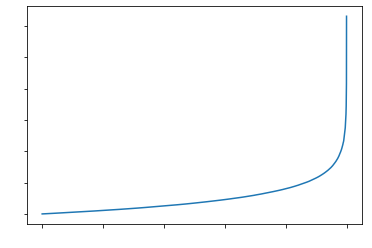

In [ ]:

from scipy.stats import logistic
import random

def logistic_ranking_score(ranking, n, loc, scale):
    return n*(1 - logistic.cdf(ranking, loc=loc, scale=scale))
X = [i for i in range(1, 101)]
Y = sorted(list(np.random.exponential(1, 100000)))

fig = plt.plot(Y)
plt.xticks(color='w')
plt.yticks(color='w')

(array([0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

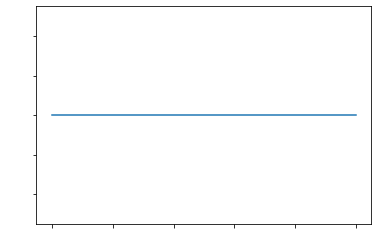

In [ ]:
plt.plot([0.5] * 1000)
plt.xticks(color='w')
plt.yticks(color='w')


fig.savefig(r'C:\Users\crist\OneDrive\Desktop\Memoria\images\graphs\constant_distr.eps', bbox_inches='tight', format='eps')



## Link documentación 

### <https://docs.google.com/document/d/1N2Ed6-63yzk-6z01UOiwG38etVU8FLUpSmJsaf2FfeA/edit#heading=h.e6itt1h5g0yl>